## Regression in DL with TensorFlow

In [1]:
# find tensorflow version
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.13.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Diamond Dataset

In [3]:
# data import kartay hyn
df = sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
df.shape

(53940, 10)

In [5]:
# preprocessing
X = df.drop('price', axis=1)
y = df['price']

# encode the categorical variables
le = LabelEncoder()
X['cut'] = le.fit_transform(X['cut'])
X['color'] = le.fit_transform(X['color'])
X['clarity'] = le.fit_transform(X['clarity'])

# train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# create neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]), #input layer without any activation function
    tf.keras.layers.Dense(32, activation='relu'), #hidden layer with 32 neurons and relu activation function
    tf.keras.layers.Dense(16, activation='relu'), #hidden layer with 16 neurons and relu activation function
    tf.keras.layers.Dense(1) #output layer with 1 neuron
])

In [7]:
# compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
# train the model
model.fit(X_train, y_train, epochs=4, verbose=1, validation_split=0.2, batch_size=32)

Epoch 1/4
1079/1079 [==============================] - 6s 4ms/step - loss: 21250532.0000 - val_loss: 5150117.0000
Epoch 2/4
1079/1079 [==============================] - 4s 3ms/step - loss: 3187131.0000 - val_loss: 1990448.8750
Epoch 3/4
1079/1079 [==============================] - 4s 4ms/step - loss: 2054823.0000 - val_loss: 1597657.1250
Epoch 4/4
1079/1079 [==============================] - 4s 4ms/step - loss: 1869974.7500 - val_loss: 1547851.2500


In [9]:
# test loss of the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

338/338 [==============================] - 1s 3ms/step - loss: 1522801.5000
Test loss: 1522801.5


In [10]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss', # this command is used to monitor the validation loss
    patience=2, # number of epochs to wait before stopping the training
    restore_best_weights=True # this command is used to restore the best weights of the model
    )

model.fit(
    X_train, y_train,
    epochs=5, # maximum number of epochs to train the model
    validation_split=0.2, # this command is used to split the data into train and validation set
    callbacks=[early_stopping], # this command is used to stop the training when the validation loss does not improve
)

Epoch 1/5
1079/1079 [==============================] - 4s 3ms/step - loss: 1822284.1250 - val_loss: 1536973.3750
Epoch 2/5
1079/1079 [==============================] - 4s 4ms/step - loss: 1788794.1250 - val_loss: 1512367.3750
Epoch 3/5
1079/1079 [==============================] - 5s 5ms/step - loss: 1751612.2500 - val_loss: 1499717.1250
Epoch 4/5
1079/1079 [==============================] - 4s 3ms/step - loss: 1718868.0000 - val_loss: 1469841.5000
Epoch 5/5
1079/1079 [==============================] - 5s 4ms/step - loss: 1685163.2500 - val_loss: 1472127.7500


In [11]:
print(f'Trained for {len(model.history.epoch)} epochs')

Trained for 5 epochs


In [12]:
history = model.fit(
        X_train, y_train,
        epochs=5, # maximum number of epochs to train the model
        validation_split=0.2, # this command is used to split the data into train and validation set
        callbacks=[early_stopping], # this command is used to stop the training when the validation loss does not improve
    )

Epoch 1/5
1079/1079 [==============================] - 5s 4ms/step - loss: 1657714.8750 - val_loss: 1423664.3750
Epoch 2/5
1079/1079 [==============================] - 5s 5ms/step - loss: 1632578.7500 - val_loss: 1406455.6250
Epoch 3/5
1079/1079 [==============================] - 5s 5ms/step - loss: 1607215.2500 - val_loss: 1391358.5000
Epoch 4/5
1079/1079 [==============================] - 4s 4ms/step - loss: 1585470.6250 - val_loss: 1378819.8750
Epoch 5/5
1079/1079 [==============================] - 4s 4ms/step - loss: 1566604.7500 - val_loss: 1371295.1250


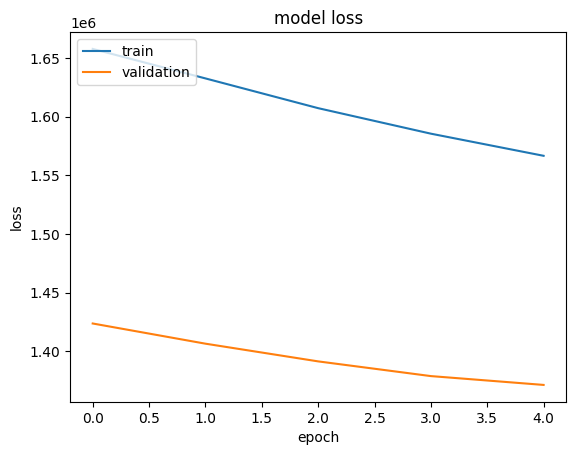

In [13]:
# plot the training and validation loss here
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Epoch 1/5
1079/1079 [==============================] - 5s 4ms/step - loss: 1547606.1250 - val_loss: 1355542.6250
Epoch 2/5
1079/1079 [==============================] - 4s 3ms/step - loss: 1530332.7500 - val_loss: 1344487.8750
Epoch 3/5
1079/1079 [==============================] - 4s 4ms/step - loss: 1514650.2500 - val_loss: 1344321.2500
Epoch 4/5
1079/1079 [==============================] - 4s 3ms/step - loss: 1501392.0000 - val_loss: 1330448.7500
Epoch 5/5
1079/1079 [==============================] - 4s 4ms/step - loss: 1486012.8750 - val_loss: 1320573.3750


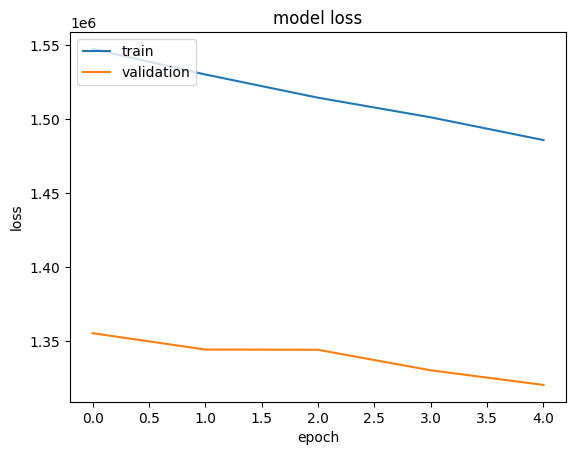

In [14]:
history = model.fit(
        X_train, y_train,
        epochs=5, # maximum number of epochs to train the model
        validation_split=0.2, # this command is used to split the data into train and validation set
        callbacks=[early_stopping], # this command is used to stop the training when the validation loss does not improve
    )
# plot the training and validation loss here
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Tips dataset

In [15]:
# Load the dataset
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Epoch 1/300
5/5 [==============================] - 2s 110ms/step - loss: 494.5746 - val_loss: 472.6657
Epoch 2/300
5/5 [==============================] - 0s 17ms/step - loss: 490.6556 - val_loss: 468.9106
Epoch 3/300
5/5 [==============================] - 0s 18ms/step - loss: 486.5276 - val_loss: 465.1801
Epoch 4/300
5/5 [==============================] - 0s 31ms/step - loss: 482.1781 - val_loss: 461.3091
Epoch 5/300
5/5 [==============================] - 0s 29ms/step - loss: 477.7121 - val_loss: 457.3098
Epoch 6/300
5/5 [==============================] - 0s 40ms/step - loss: 473.1802 - val_loss: 453.3346
Epoch 7/300
5/5 [==============================] - 0s 31ms/step - loss: 468.4162 - val_loss: 449.4688
Epoch 8/300
5/5 [==============================] - 0s 32ms/step - loss: 463.6839 - val_loss: 445.5076
Epoch 9/300
5/5 [==============================] - 0s 37ms/step - loss: 458.6413 - val_loss: 441.3377
Epoch 10/300
5/5 [==============================] - 0s 29ms/step - loss: 453.3116

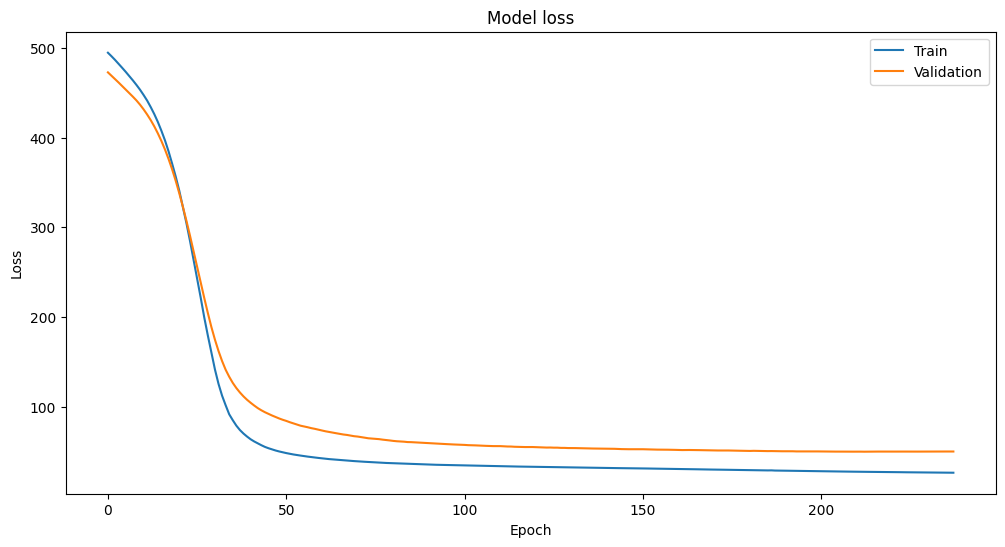

2/2 [==============================] - 0s 5ms/step - loss: 46.1506
Test loss: 46.150638580322266


In [16]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# Load the dataset
tips = sns.load_dataset('tips')

# label encoding
le = LabelEncoder()
tips['sex'] = le.fit_transform(tips['sex'])
tips['smoker'] = le.fit_transform(tips['smoker'])
tips['day'] = le.fit_transform(tips['day'])
tips['time'] = le.fit_transform(tips['time'])

# Separate features and target
X = tips.drop('total_bill', axis=1) # assuming we're predicting the total_bill
y = tips['total_bill']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=[X_train.shape[1]]),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=25,  
    restore_best_weights=True  
)

# Train the model
history = model.fit(
    X_train, 
    y_train, 
    epochs=300,  
    batch_size=32, 
    validation_split=0.2, 
    callbacks=[early_stopping]  
)

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')